One Class Surrounding another Class. Bidimensional.
100 batches of 525 instances



METHOD: Static lp as classifier
Execution time:  0.9523153157744406
Average micro-F1: 0.6386
Average Accuracy:  63.9716
Standard Deviation:  12.9906366064
Variance:  168.75663944


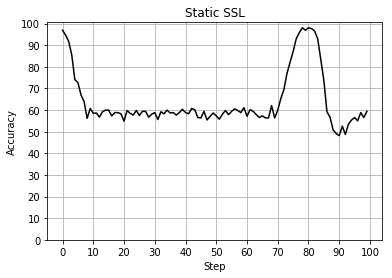

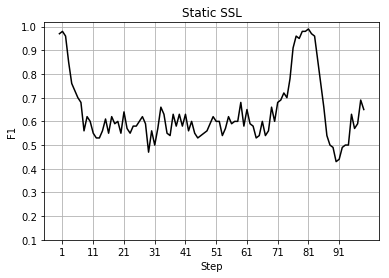




METHOD: Sliding lp as classifier
Execution time:  1.0507957916494324
Average micro-F1: 0.9085999999999999
Average Accuracy:  90.4987
Standard Deviation:  17.2916123398
Variance:  298.99985731


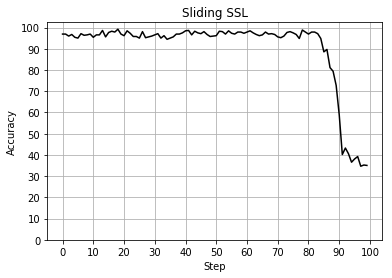

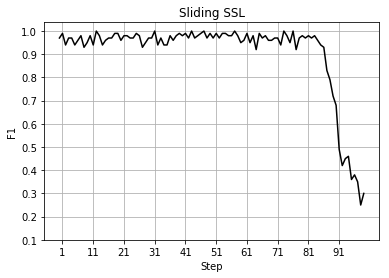




METHOD: Incremental lp as classifier
Execution time:  28.239767419534907
Average micro-F1: 0.6389
Average Accuracy:  63.9736
Standard Deviation:  12.6428088272
Variance:  159.84061504


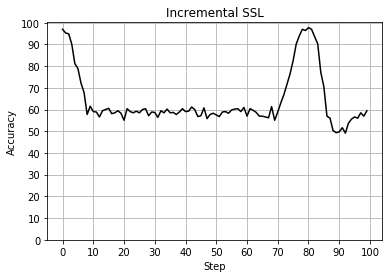

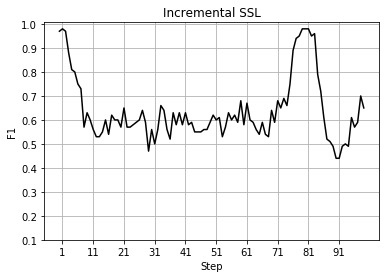




METHOD: lp as classifier and kde as core support extraction with cutting data method
Execution time:  2.644843482654636
Average micro-F1: 0.9538
Average Accuracy:  94.9387
Standard Deviation:  3.26452436199
Variance:  10.65711931


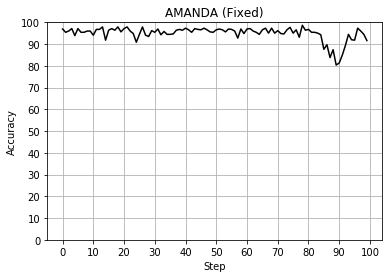

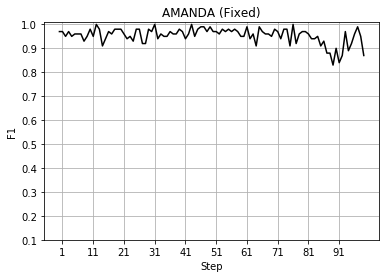




METHOD: lp as classifier and kde and Hellinger distance as dynamic CSE
Execution time:  5.302085567898587
Average micro-F1: 0.9194
Average Accuracy:  91.3277
Standard Deviation:  14.1374803169
Variance:  199.86834971


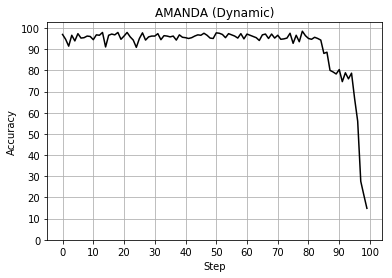

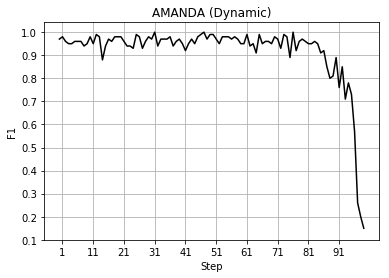

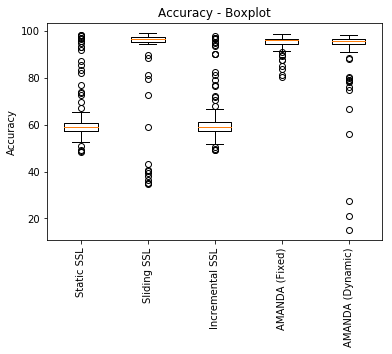

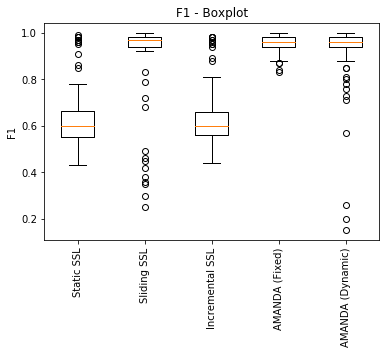

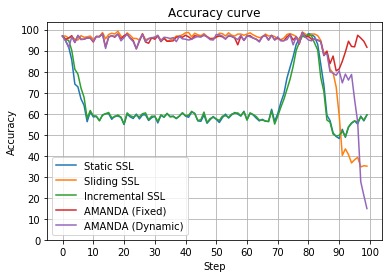

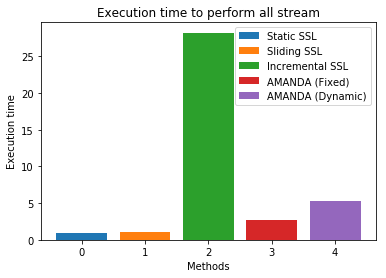

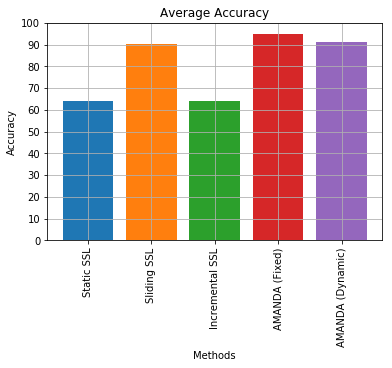

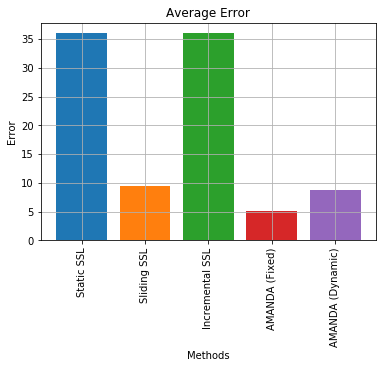

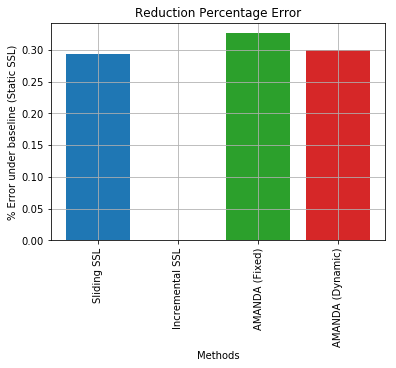

In [1]:
import sys
import os
from pathlib import Path
os.chdir(Path(os.getcwd()).resolve().parents[1])

import setup
from methods import runExperiments
from methods import static_labelpropagation
from methods import amanda_dynamic
from methods import amanda_fixed
from methods import incremental_LN
from methods import deslizante_LN
from methods import compose_gmm_version


class Experiment():
     def __init__(self, method, K=None, excludingPercentage=None, densityFunction=None, clfName=None):
        self.method = method
        self.clfName = clfName
        self.densityFunction=densityFunction
        self.excludingPercentage = excludingPercentage
        self.K_variation = K


def loadLevelResults(path, sep, key, steps):
    originalAccs, F1s, time = setup.loadLevelIwBoxplotResults(path, sep)
    predictions = F1s[key]
    predictions = [ predictions[i::steps] for i in range(steps) ]
    
    return predictions, originalAccs[key], time[key]


def main():
    experiments = {}
    is_windows = sys.platform.startswith('win')
    sep = '\\'

    if is_windows == False:
        sep = '/'

    path = os.getcwd()+sep+'data'+sep
    
    # SETTINGS
    sslClassifier = 'lp' # lp = label propagation, rf = random forests, cl = cluster and label, knn = k-nn, svm = svm
    steps = 100
    poolSize = None
    isBatchMode = True # False = Stream
    isBinaryClassification = False
    isImbalanced = True
    externalResults = []
    
    # Load dataset
    dataValues, dataLabels, description = setup.loadCSurr(path, sep)
    
    # Only 5% of initial labeled data - Extreme verification latency scenario
    labeledData = int(0.05*len(dataLabels))

    # Static SSL
    experiments[0] = Experiment(static_labelpropagation, 11, clfName=sslClassifier)
    
    # Sliding SSL
    experiments[1] = Experiment(deslizante_LN, 11, clfName=sslClassifier)
    
    # Incremental SSL
    experiments[2] = Experiment(incremental_LN, 11, clfName=sslClassifier)
    
    # Proposed Method 1 (AMANDA - Fixed core extraction percentage)
    experiments[3] = Experiment(amanda_fixed, 11, 0.65, "kde", sslClassifier)

    # Proposed method 2 (AMANDA - Dynamic core extraction percentage)
    experiments[4] = Experiment(amanda_dynamic, 11, None, "kde", sslClassifier)
    
    # Run experiments
    runExperiments.run(dataValues, dataLabels, description, isBinaryClassification, isImbalanced, 
                       experiments, steps, labeledData, isBatchMode, poolSize, externalResults)
    

if __name__ == "__main__":
    main()